# Failure Analysis in Power Transformers

A transformer can fail for a variety of reasons, but the most common causes include lightning strikes, overloading, wear and corrosion, power surges, and moisture. Regardless of the cause, the result can be remarkable. Transformers contain mineral oil keeping the transformer cool. When it becomes overcharged, the wiring can create heat and a spark. This massive overpressure may eventually cause the transformer to rupture with a loud boom, flash, and possibly a fireball that can create a large plume of smoke that can be seen from a long distance.

Reference : https://www.kaggle.com/shashwatwork/failure-analysis-in-power-transformers-dataset

In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [136]:
df = pd.read_csv('Health index1.csv')

In [93]:
df.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hydrogen,470.0,404.261702,2002.142678,0.00,4.00,9.0,34.00,23349.0
Oxigen,470.0,8357.372340,14164.233283,57.00,496.00,3810.0,14875.00,249900.0
Nitrogen,470.0,47759.561702,13760.451816,3600.00,41700.00,49100.0,55875.00,85300.0
Methane,470.0,79.695745,489.320336,0.00,2.00,3.0,7.00,7406.0
CO,470.0,244.000000,237.267485,10.00,66.00,150.5,361.75,1730.0
CO2,470.0,1816.414894,2256.790519,48.00,641.75,1125.0,2257.50,24900.0
Ethylene,470.0,162.923404,1323.811504,0.00,0.00,3.0,6.00,16684.0
Ethane,470.0,81.940426,342.573636,0.00,0.00,4.0,69.75,5467.0
Acethylene,470.0,91.491489,644.365828,0.00,0.00,0.0,0.00,9740.0
DBDS,470.0,17.036596,46.735057,0.00,0.00,0.0,2.00,227.0


In [137]:
def cor(x):
    if x < 5:
        x = 1
    else:
        x =0
    return x

In [138]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df['Ethylene'] = df['Ethylene'].apply(cor)

In [139]:
def car(x):
    if x > 60:
        x = 1
    elif x > 10:
        x = 2
    else:
        x =0
    return x

In [140]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df['Ethane'] = df['Ethane'].apply(cor)

In [141]:
df.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index',
       'Life expectation'],
      dtype='object')

In [142]:
df = df[[
    'Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
    'Ethane', 'Interfacial V', 'Dielectric rigidity', 'Water content',
    'Health index', 'Life expectation'
]]

In [143]:
df.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Interfacial V', 'Dielectric rigidity', 'Water content',
       'Health index', 'Life expectation'],
      dtype='object')

In [144]:
df['Ethane'].unique()

array([1, 0])

Text(0.5, 1.0, 'Variable Original')

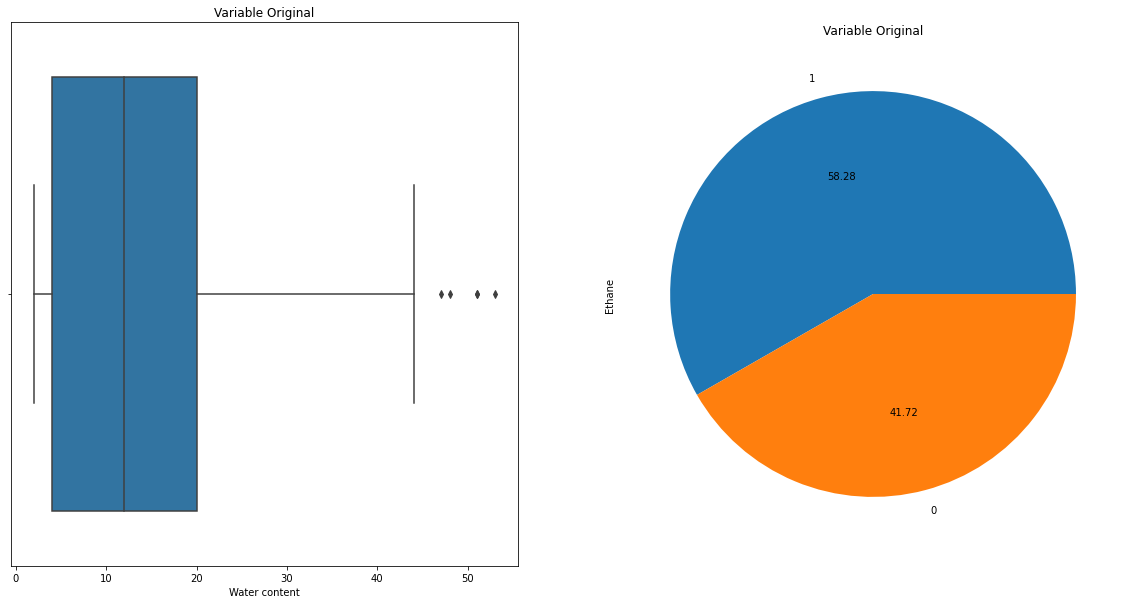

In [145]:
fig, axes = plt.subplots(1,2,figsize = (20,10))
plt.subplots_adjust(hspace=0.3)
fig.subplots_adjust(hspace=.2)

sns.boxplot(df['Water content'], ax = axes[0])
axes[0].set_title('Variable Original')

plot = df['Ethane'].value_counts().plot(kind='pie', autopct='%.2f')
axes[1].set_title('Variable Original')

Text(0.5, 1.0, 'Variable Original')

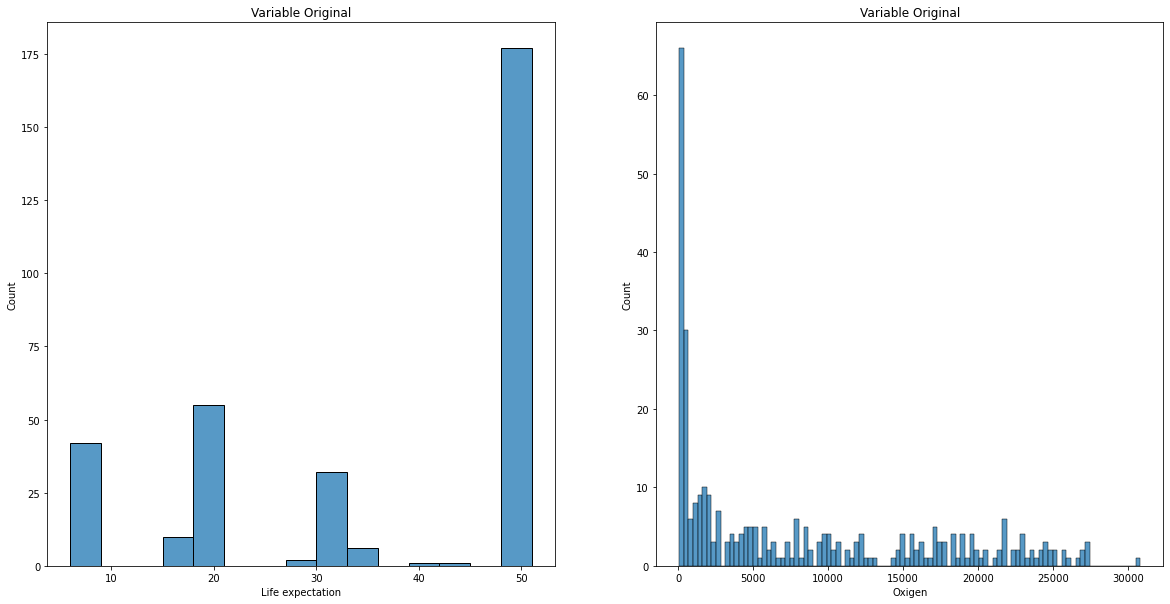

In [152]:
fig, axes = plt.subplots(1,2,figsize = (20,10))
plt.subplots_adjust(hspace=0.3)
fig.subplots_adjust(hspace=.2)

sns.histplot(df['Life expectation'], ax = axes[0], bins = 15)
axes[0].set_title('Variable Original')

sns.histplot(df['Oxigen'], ax = axes[1], bins = 100)
axes[1].set_title('Variable Original')